In [37]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib as mpl
import scipy.stats as stats
import sys
import os
from importlib import reload
from tqdm import tqdm
import pickle5 as pickle
cwd=os.getcwd()

In [30]:
# Import code
sys.path.insert(0, './../../../Scripts/scripts_unstructured/')
input_dir=cwd+'/simulations_cluster'

In [31]:
#find . -name 'FigureS1*' -exec bash -c ' mv $0 ${0/\100.0/100.000000}' {} \;


# This notebook loads already run simulations. For getting those simulations go to folder get_simulations

In [42]:
nrates=10
nJs=5
nreps=100
nrep_Vec=range(nreps)
r_X_Vec=10**(np.linspace(0.1,2,nrates))
J_Vec=np.exp(np.linspace(-9,-5.3,nJs)) #np.array([0.00012341, 0.00031122, 0.00078486, 0.001, 0.00197932]) #

tensor="True"
fun_vecs_names=["ReLU","SSN","Non-Sat LIF","LIF"]


moments_of_r_sim=np.zeros((5,4,nrates,nJs,nreps))*np.nan


for idx_nrep, nrep in zip(range(nreps),nrep_Vec):
    for idx_rX, rX in zip(range(nrates),r_X_Vec):
        for idx_J, J in zip(range(nJs),J_Vec):
            #--------------------------------------------------------------------------
            inpath = input_dir + "/FigureS1_"
            c1 = "nrep={:d}rX_{:.6f}-J_{:6f}-nrep_{:d}-tensor_{:s}.pkl".format(nrep, rX, J,nrep, tensor)

            try:
                with open(inpath+c1, 'rb') as handle5:
                    aux_mat = pickle.load(handle5)
                moments_of_r_sim[:,:,idx_rX,idx_J,idx_nrep]=aux_mat["moments_of_r_sim"]
            except:
                pass
                #print(inpath+c1)

output_dict={}
output_dict["moments_of_r_sim"]=moments_of_r_sim
output_dict["functions_names"]=fun_vecs_names
output_dict["r_X_Vec"]=r_X_Vec
output_dict["J_Vec"]=J_Vec
output_dict["nrep_Vec"]=nrep_Vec


     

# Plot moments Vs Rates

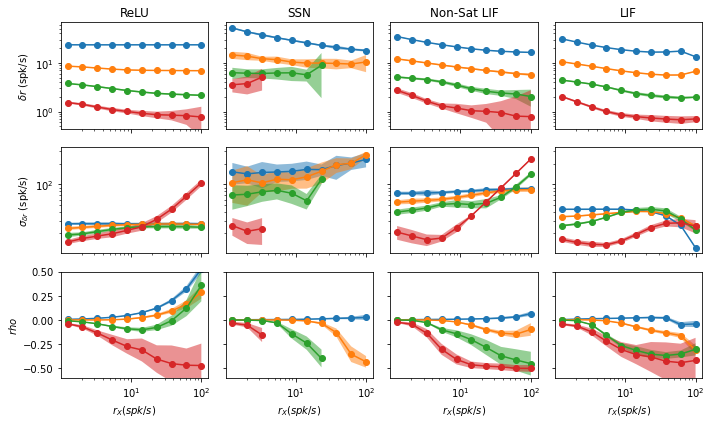

In [41]:

rows=3;cols=len(fun_vecs_names);
fig, axs = plt.subplots(rows,cols, figsize=(2*cols,2.*rows), facecolor='w', edgecolor='k',squeeze=False,sharey='row',sharex='col')
fig.subplots_adjust(hspace = .1, wspace=.1)

nameout='FigureS1'

for idx_funcs in range(len(fun_vecs_names)):

    
    this_mean_over = np.nanmean(moments_of_r_sim[:,idx_funcs,:,:,:],-1)
    this_std_over  = np.nanstd(moments_of_r_sim[:,idx_funcs,:,:,:],-1)


    for idx_J, J in zip(range(nJs),J_Vec):

        this_sum=this_mean_over+this_std_over
        this_subs=this_mean_over-this_std_over

        axs[0,idx_funcs].loglog(r_X_Vec,this_mean_over[1,:,idx_J], marker='o',label=J)
        axs[0,idx_funcs].fill_between(r_X_Vec, this_subs[1,:,idx_J],this_sum[1,:,idx_J], alpha=0.5)
        axs[0,idx_funcs].set_label(J)

        axs[1,idx_funcs].loglog(r_X_Vec,this_mean_over[3,:,idx_J], marker='o',label='std')
        axs[1,idx_funcs].fill_between(r_X_Vec, this_subs[3,:,idx_J],this_sum[3,:,idx_J], alpha=0.5)
        axs[1,idx_funcs].set_label(J)

        axs[2,idx_funcs].plot(r_X_Vec,this_mean_over[4,:,idx_J],marker='o',label='std')
        axs[2,idx_funcs].fill_between(r_X_Vec, this_subs[4,:,idx_J],this_sum[4,:,idx_J], alpha=0.5)


        axs[2,idx_funcs].set_xlabel('$r_X (spk/s)$')
        axs[2,idx_funcs].set_label(J)
        
    axs[0,idx_funcs].set_title(fun_vecs_names[idx_funcs])
    
    
axs[0,0].set_ylabel('$\delta r$ (spk/s)')
axs[1,0].set_ylabel('$\sigma_{\delta r}$ (spk/s)')
axs[2,0].set_ylabel('$rho$ ')
axs[2,0].set_ylim([-0.6,0.5])
fig.set_size_inches(2.5*cols,2.*rows)

fig.tight_layout()
fig.savefig(input_dir+'/'+nameout+'.pdf', bbox_inches='tight')
